In [ ]:
#d2ee0448c8314fd4bb69e71a9fd145f1

In [1]:
# Import necessary libraries
import requests
from textblob import TextBlob

In [2]:
# Function to fetch news articles from a news API
def fetch_news(api_key, topic):
    url = f'https://newsapi.org/v2/everything?q={topic}&apiKey={api_key}'
    response = requests.get(url)
    data = response.json()
    articles = data['articles']
    return articles

In [3]:
# Function to analyze sentiment of news articles using NLP
def analyze_sentiment(articles):
    sentiments = []
    for article in articles:
        text = article['title'] + ' ' + article['description']
        blob = TextBlob(text)
        sentiment = blob.sentiment.polarity
        sentiments.append((article, sentiment))
    return sentiments

In [4]:
# Function to recommend news articles based on sentiment analysis
def recommend_articles(sentiments):
    recommended_articles = []
    for article, sentiment in sentiments:
        if sentiment > 0.2:  # Recommend articles with positive sentiment
            recommended_articles.append(article)
    return recommended_articles

In [5]:
# Main function
def main():
    # API key for accessing news API (replace 'YOUR_API_KEY' with your actual API key)
    api_key = 'aedb92edb854410fbe05f61521b675f9'

    # User input for topic of interest
    topic = input("Enter a topic of interest: ")

    # Fetch news articles
    articles = fetch_news(api_key, topic)

    # Analyze sentiment of news articles
    sentiments = analyze_sentiment(articles)

    # Recommend news articles based on sentiment analysis
    recommended_articles = recommend_articles(sentiments)

    # Display recommended articles
    print("\nRecommended Articles:")
    for article in recommended_articles:
        print(article['title'])
        print(article['url'])
        print()

In [18]:
# Run the main function
if __name__ == "__main__":
    main()

Enter a topic of interest: Hindustan Times

Recommended Articles:
After Shah Rukh Khan and Deepika-Ranveer, Amitabh Bachchan buys land in Alibaug. Check out other celebs who own luxurious homes in coastal town
https://indianexpress.com/article/entertainment/bollywood/after-shah-rukh-khan-deepika-ranveer-amitabh-bachchan-buys-land-alibaug-check-out-other-celebs-luxurious-homes-coastal-town-9284159/

India heading towards huge earnings growth; 15% return can't be ruled out: Vinay Jaising
https://economictimes.indiatimes.com/markets/expert-view/india-heading-towards-huge-earnings-growth-15-return-cant-be-ruled-out-vinay-jaising/articleshow/109128961.cms

Zeenat Aman responds to Mumtaz calling her marriage ‘living hell’, criticism on live-in advice: ‘I never tear down my colleagues’
https://indianexpress.com/article/entertainment/bollywood/zeenat-aman-fires-back-mumtaz-calling-her-marriage-living-hell-criticism-on-live-in-advice-9273386/

Индийский фильм впервые за 30 лет поборется за глав

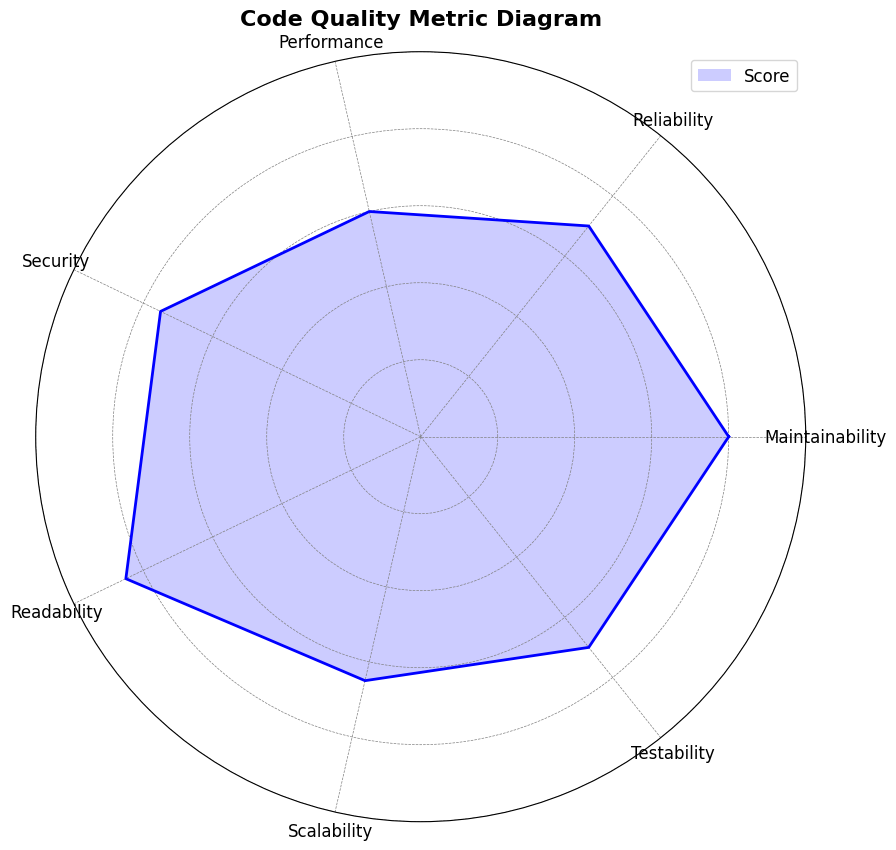

In [9]:
fimport matplotlib.pyplot as plt
import numpy as np

def plot_radar_chart(metrics, scores, filename=None):
    # Number of metrics
    num_metrics = len(metrics)

    # Create a radar chart
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Divide the circle into equal parts
    theta = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

    # Add the first metric at the end to close the circle
    scores += scores[:1]

    # Repeat the first theta value to close the circle
    theta += theta[:1]

    # Plot the radar chart
    ax.fill(theta, scores, 'b', alpha=0.2)  # Fill the area enclosed by the plotted points
    ax.plot(theta, scores, color='b', linewidth=2)  # Plot the lines connecting the points

    # Set the y-axis limit to [0, 1]
    ax.set_ylim(0, 1)

    # Hide y-axis labels
    ax.set_yticklabels([])

    # Set the x-axis labels (metrics)
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(metrics, fontsize=12)  # Set metric names as x-axis labels

    # Display the radar chart
    plt.title('Code Quality Metric Diagram', fontsize=16, fontweight='bold')

    # Add gridlines
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

    # Add a legend for reference
    ax.legend(['Score'], loc='upper right', fontsize=12)

    # Save the plot if filename is provided
    if filename:
        plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

# Define quality metrics and their scores (normalized to [0, 1])
metrics = ['Maintainability', 'Reliability', 'Performance', 'Security', 'Readability', 'Scalability', 'Testability']
scores = [0.8, 0.7, 0.6, 0.75, 0.85, 0.65, 0.7]  # Example scores, normalized to [0, 1]

# Plot and save the enhanced radar chart
plot_radar_chart(metrics, scores, filename='code_quality_radar_chart_enhanced.png')
